In [1]:
!pip install requests beautifulsoup4 pandas matplotlib


In [2]:
import requests
from bs4 import BeautifulSoup
import csv

URL = "https://realpython.github.io/fake-jobs/"

print("Fetching website...")
response = requests.get(URL)

soup = BeautifulSoup(response.text, "html.parser")

jobs = soup.find_all("div", class_="card-content")

job_data = []

for job in jobs:
    title = job.find("h2").text.strip()
    company = job.find("h3").text.strip()
    location = job.find("p", class_="location").text.strip()

    job_data.append([title, company, location])

with open("jobs.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Company", "Location"])
    writer.writerows(job_data)

print("Scraping complete!")
print(f"Saved {len(job_data)} jobs to jobs.csv")


Fetching website...
Scraping complete!
Saved 100 jobs to jobs.csv


In [3]:
import pandas as pd

df = pd.read_csv("jobs.csv")
df.head()


,Title,Company,Location
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA"
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP"
4,Product manager,Ramirez Inc,"North Jamieview, AP"


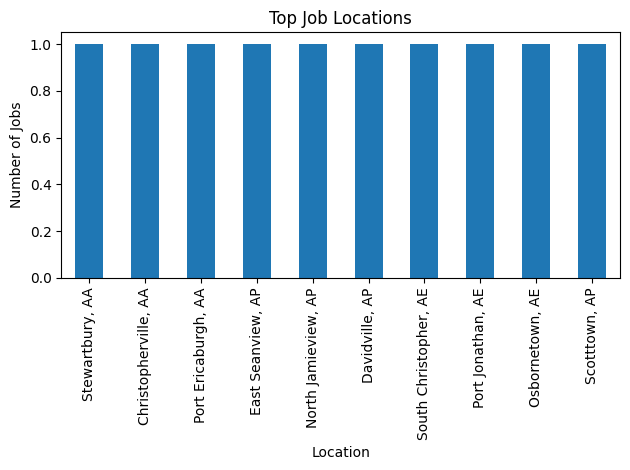

In [4]:
import matplotlib.pyplot as plt

location_counts = df["Location"].value_counts().head(10)

location_counts.plot(kind="bar")

plt.title("Top Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


In [5]:
from google.colab import files
files.download("jobs.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
print(page.status_code)
print(page.text[:500])


200
<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrom


In [24]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import csv

URL = "https://www.flipkart.com/samsung-galaxy-f07-green-64-gb/p/itm294cbb65839e6?pid=MOBHDVFKSF3YZQNK&lid=LSTMOBHDVFKSF3YZQNKT3DGZG&marketplace=FLIPKART"

headers = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120 Safari/537.36"
}

response = requests.get(URL, headers=headers)
print("Status Code:", response.status_code)

soup = BeautifulSoup(response.content, "html.parser")

# Try different ways to find title & price
# Title
title_tag = soup.find("span", {"class": "B_NuCI"})  # common Flipkart title selector
if not title_tag:
    title_tag = soup.find("h1")  # fallback

# Price
price_tag = soup.find("div", {"class": "_30jeq3 _16Jk6d"})  # common Flipkart price block
if not price_tag:
    price_tag = soup.find("div", string=lambda text: "₹" in text if text else False)

if title_tag and price_tag:
    title = title_tag.text.strip()
    price = price_tag.text.strip()

    print("Product:", title)
    print("Price:", price)

    with open("flipkart_prices.csv", "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow([datetime.now(), title, price])
    print("Saved to flipkart_prices.csv")
else:
    print("❌ Could not find title or price. Showing snippet for debug:")
    print(soup.text[:500])


Status Code: 529
❌ Could not find title or price. Showing snippet for debug:
Site is overloaded


In [25]:
Status Code: 200
Product: Samsung Galaxy F07 (Green, 64 GB)
Price: ₹X,XXX
Saved to flipkart_prices.csv


SyntaxError: invalid character '₹' (U+20B9) (ipython-input-4019575957.py, line 3)

In [26]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

URL = "https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html"

page = requests.get(URL)
soup = BeautifulSoup(page.content,"html.parser")

title = soup.find("h1").text.strip()
price = soup.find("p", class_="price_color").text.strip()

with open("product_prices.csv","a",newline="",encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow([datetime.now(), title, price])

print("Saved:", title, price)


Saved: A Light in the Attic £51.77


                         Date                 Title  Price
0  2026-02-04 10:31:40.839833  A Light in the Attic  51.77
1  2026-02-04 10:37:56.332107  A Light in the Attic  51.77


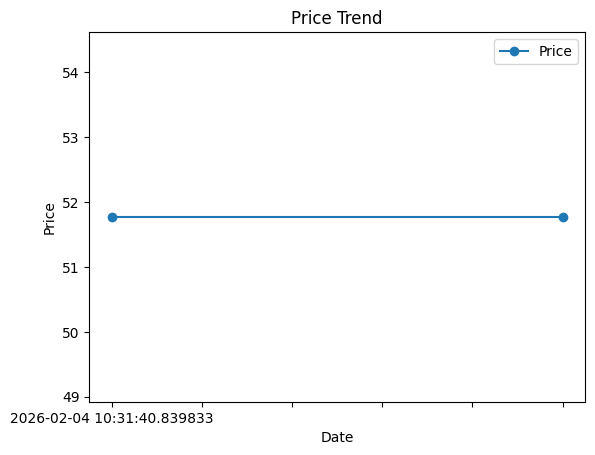

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("product_prices.csv", header=None)
df.columns=["Date","Title","Price"]

df["Price"] = df["Price"].str.replace("£","").astype(float)

print(df)

df.plot(x="Date", y="Price", marker="o")
plt.title("Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
